In [1]:
%pip install tulipy
%pip install textblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tulipy as ti
from textblob import TextBlob

In [6]:
# Load Combined Stock Data
file_path = '../../data/combined_stock_data.csv'
combined_data = pd.read_csv(file_path)

# Load News Data
news_file_path = '../../data/raw_analyst_ratings.csv'
news_data = pd.read_csv(news_file_path)

# Ensure Date is a Datetime Object for Both Datasets
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data = news_data.dropna(subset=['date'])

# Align News and Stock Data by Date
combined_data.set_index('Date', inplace=True)
news_data['date'] = news_data['date'].dt.date
news_data_grouped = news_data.groupby('date')['headline'].apply(lambda x: ' '.join(x))
news_data_grouped = news_data_grouped.reset_index()

In [7]:
# Conduct Sentiment Analysis on News Headlines
def calculate_sentiment(headline):
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

news_data_grouped['sentiment'] = news_data_grouped['headline'].apply(calculate_sentiment)

# Adjust Date Columns to Match Datetime Format
news_data_grouped['date'] = pd.to_datetime(news_data_grouped['date'])
combined_data.reset_index(inplace=True)

# Merge Sentiment Data with Stock Data
stock_and_news = pd.merge(combined_data, news_data_grouped, left_on='Date', right_on='date', how='left')

# Calculate Daily Stock Returns
stock_and_news['Daily_Returns'] = stock_and_news['Close'].pct_change()

# Perform Correlation Analysis
correlation = stock_and_news[['Daily_Returns', 'sentiment']].corr()
print("Correlation between Daily Returns and Sentiment:")
print(correlation)

Correlation between Daily Returns and Sentiment:
               Daily_Returns  sentiment
Daily_Returns       1.000000   0.009605
sentiment           0.009605   1.000000


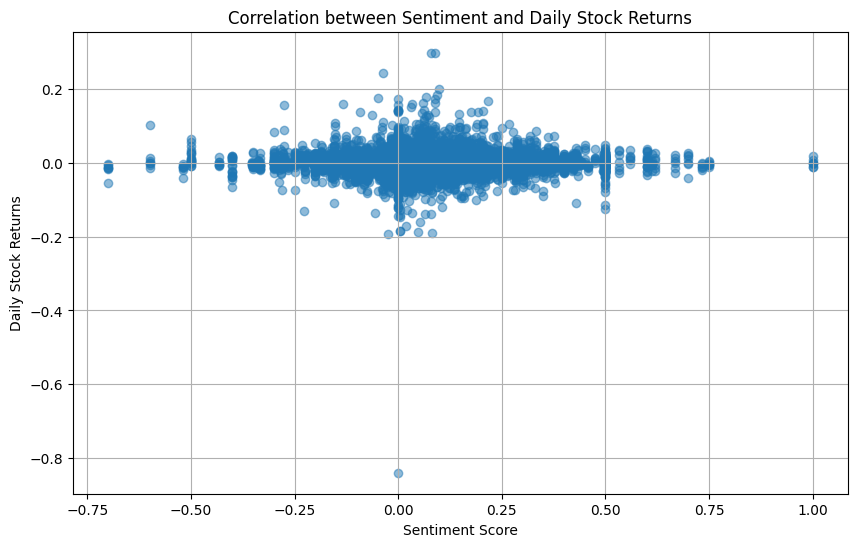

Processed data saved to ../../data/stock_and_news_correlation.csv


In [9]:
# Visualization of Sentiment and Stock Returns
plt.figure(figsize=(10, 6))
plt.scatter(stock_and_news['sentiment'], stock_and_news['Daily_Returns'], alpha=0.5)
plt.title('Correlation between Sentiment and Daily Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Returns')
plt.grid(True)
plt.show()

# Optional: Save Processed Data
output_file = '../../data/stock_and_news_correlation.csv'
stock_and_news.to_csv(output_file, index=False)
print(f"Processed data saved to {output_file}")
